Accuracy: 0.9815
ROC AUC: 0.9627785896967482
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.88      0.53      0.66        68

    accuracy                           0.98      2000
   macro avg       0.93      0.76      0.83      2000
weighted avg       0.98      0.98      0.98      2000



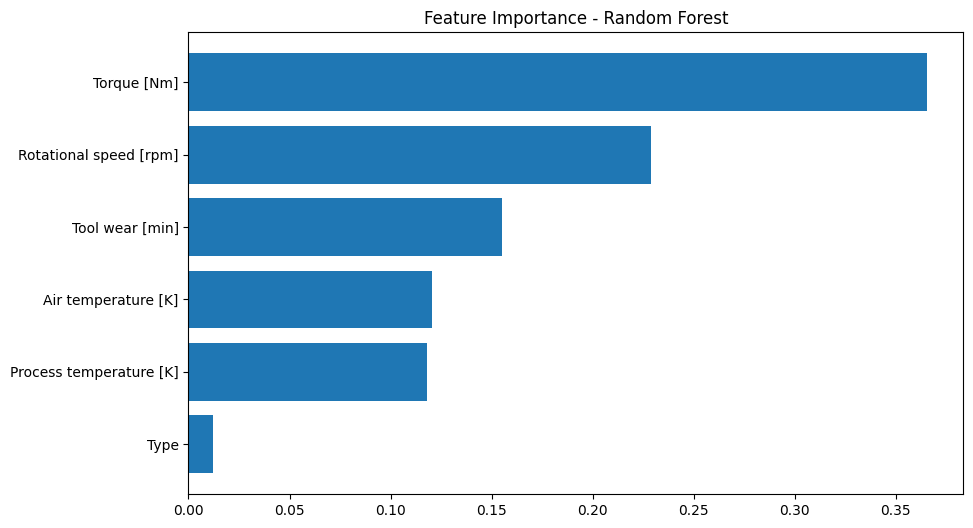

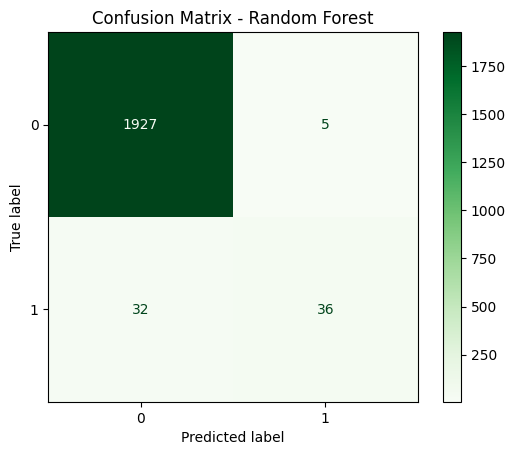

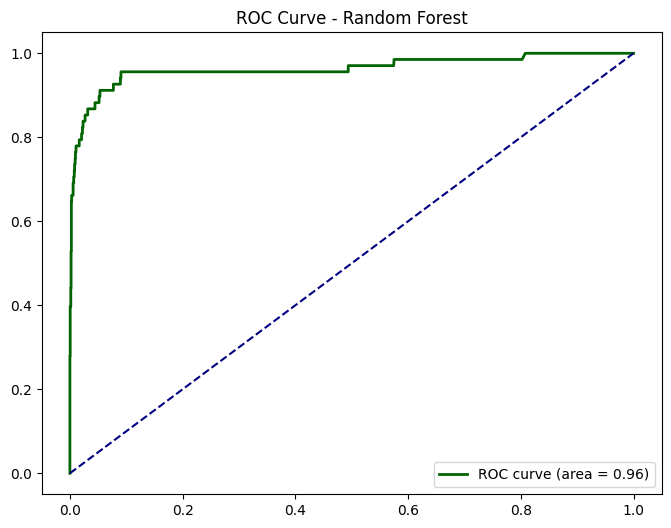

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# 1. Load and Preprocess
df = pd.read_csv('ai4i2020.csv')
df = df.drop(['UDI', 'Product ID'], axis=1)
df['Type'] = LabelEncoder().fit_transform(df['Type'])

# Remove leakage columns
X = df.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df['Machine failure']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Model - Random Forest (Best Params)
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=4, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Metrics
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))
print(classification_report(y_test, y_pred))

# 3. Visualizations

# Feature Importance
feature_importance = rf.feature_importances_
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.title('Feature Importance - Random Forest')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot(cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()